In [1]:
__author__ = "Ryan Soklaski"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import cPickle
from collections import Counter

# Loading Data

In [5]:
#loading data
with open('data/player_to_rank.p','rb') as f:
     player_to_rank_dict = cPickle.load(f)
with open('data/player_to_pt.p','rb') as f:
     player_to_pts_dict = cPickle.load(f)
with open('data/player_to_country.p') as f:
    player_to_cntry_dicts = cPickle.load(f)
with open('data/player_to_tag.pckl') as f:
    player_to_tag = cPickle.load(f)
with open('data/player_to_character.pckl') as f:
    player_to_character = cPickle.load(f)
with open('data/player_to_cumpts.pckl') as f:
    player_to_cumpts = cPickle.load(f)
with open('data/player_to_cumplacements.pckl') as f:
    player_to_cumplacements = cPickle.load(f)
with open('data/player_rank_link.p') as f:
    player_rank_link = cPickle.load(f)
with open('data/scrubed_tourney_data.p', 'rb') as f_:
    scrubed_tourney_data = cPickle.load(f_)
with open('data/all_char_names.p', 'rb') as f_:
    all_char_names = cPickle.load(f_)

# with open('data/char_to_count.p', 'rb') as f_:
#     char_to_count = cPickle.load(f_)
with open('data/char_to_tier.p', 'rb') as f_:
    char_to_tier = cPickle.load(f_)
# with open('data/char_to_cnt_rank.p', 'rb') as f_:
#     char_to_cnt_rank = cPickle.load(f_)
    
with open('data/player_DataFrame.pckl', 'rb') as f_:
    player_df = cPickle.load(f_) 
    
with open('df_discr.pckl', 'rb') as f_:
    df_discr = cPickle.load(f_)

In [34]:
# player_names = [str(name) for name in player_df.index]
# player_df["Name"] = pd.Series(player_names, index=player_df.index, name='Name')
# player_df["Points Series"] =  pd.Series(player_to_cumpts)
# player_df["Placement Series"] = pd.Series(player_to_cumplacements)
# player_df["Character Series"] = pd.Series(player_to_character)

# with open('data/player_DataFrame.pckl', 'wb') as f_:
#     cPickle.dump(player_df, f_) 

## Data Work

In [79]:
# player_to_country
with open('data/player_to_country.p','rb') as f:
     player_to_country = cPickle.load(f)
        
countries_data = [player_to_country[i] for i in player_to_country if player_to_country[i] != '']
country_to_count = Counter(countries_data)
d_country = pd.Series(country_to_count)

In [80]:
# char_usage_accum
with open('data/char_usage_accum.p','rb') as f:
     all_chars_accum = cPickle.load(f)
char_to_count = Counter(all_chars_accum)
char_to_count['Dan']=0
s_char = pd.Series(char_to_count)

# Plots

In [120]:
# plot options
axis_opts = dict(fontsize=17)
title_opts = dict(fontsize=25)
tick_opts = dict(axis='both', which='major', labelsize=17)
colors = ['blue', 'green','red','purple','yellow','lightblue']
muted = dict([(clr,val) for clr,val in zip(colors, sns.color_palette())])

## - Character Popularity Statistics

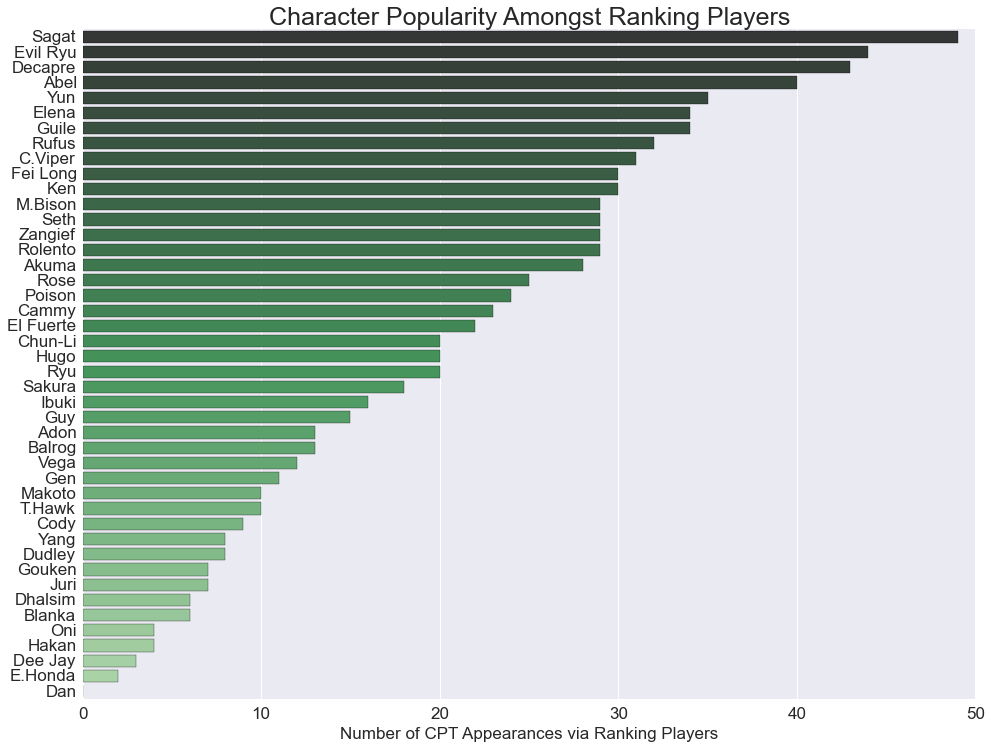

In [108]:
# character popularity
fig,ax = plt.subplots(figsize=(16,12))
x = s_char.sort_values(ascending=False)
y = s_char.sort_values(ascending=False).index
sns.barplot(x, y, palette="Greens_d");
ax.tick_params(**tick_opts)
ax.set_xlabel("Number of CPT Appearances via Ranking Players", **axis_opts)
ax.set_title("Character Popularity Amongst Ranking Players", **title_opts)

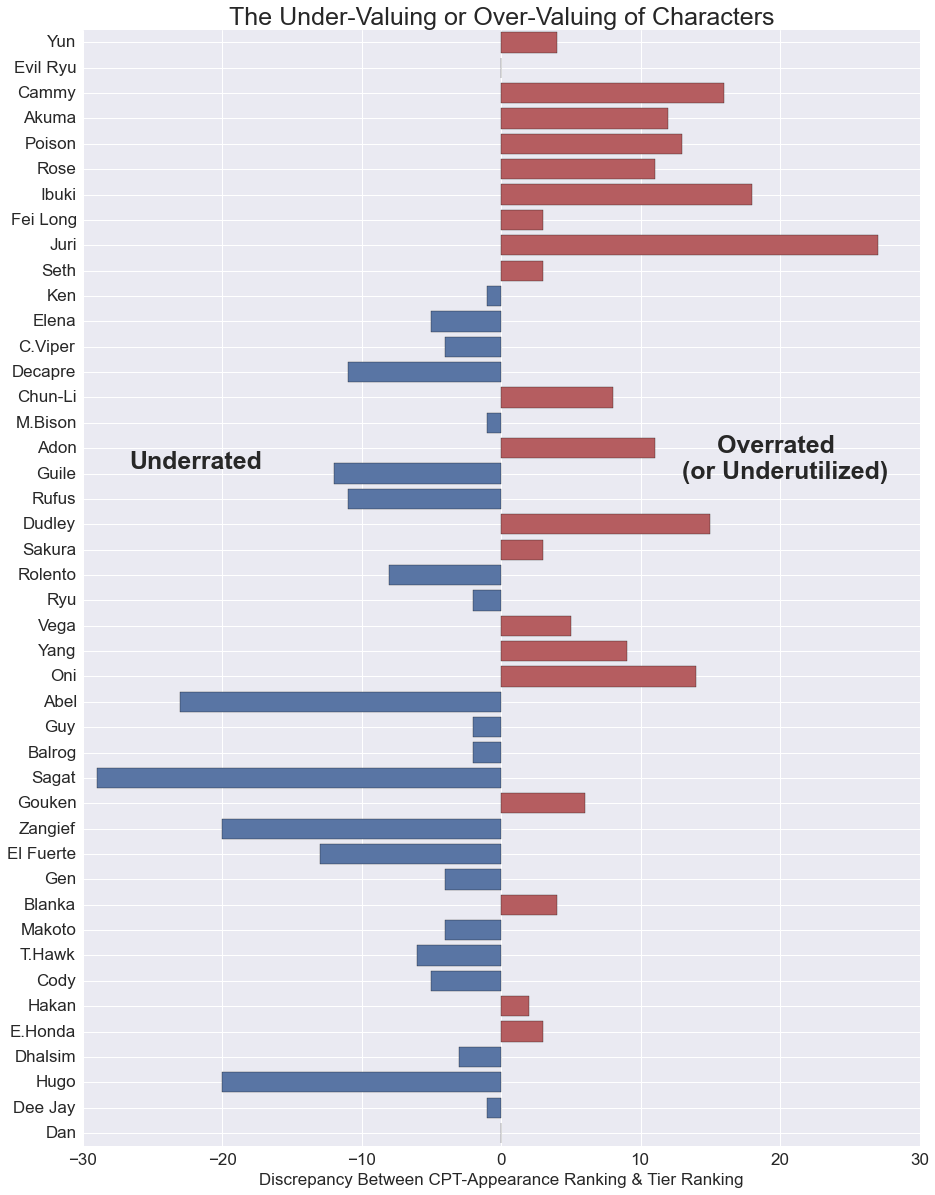

In [124]:
# Under/Overrating
# clrs = [np.array([0.05333333, 0.3545098 , 0.05333333,  1.]) if x <= 0 else np.array([0.65333333, 0.05333333, 0.05333333, 1.]) for x in df["Tier Discrepancy"]]
clrs = [muted['blue'] if x <= 0 else muted['red'] for x in df["Tier Discrepancy"]]
fig,ax = plt.subplots(figsize=(15,20))
sns.barplot(y="Name", x="Tier Discrepancy", data=df, palette=clrs)

ax.grid('on')
ax.set_ylabel("", fontsize=17)
ax.set_xlabel("Discrepancy Between CPT-Appearance Ranking & Tier Ranking", **axis_opts)
ax.set_title("The Under-Valuing or Over-Valuing of Characters", **title_opts)
ax.tick_params(**tick_opts)
ax.text(13, 17.2, '{:^40}'.format('Overrated \n(or Underutilized)'), fontsize=25, fontweight='bold')
ax.text(-26.5, 16.8, 'Underrated', fontsize=25, fontweight='bold')

## - Country-Based Statistics

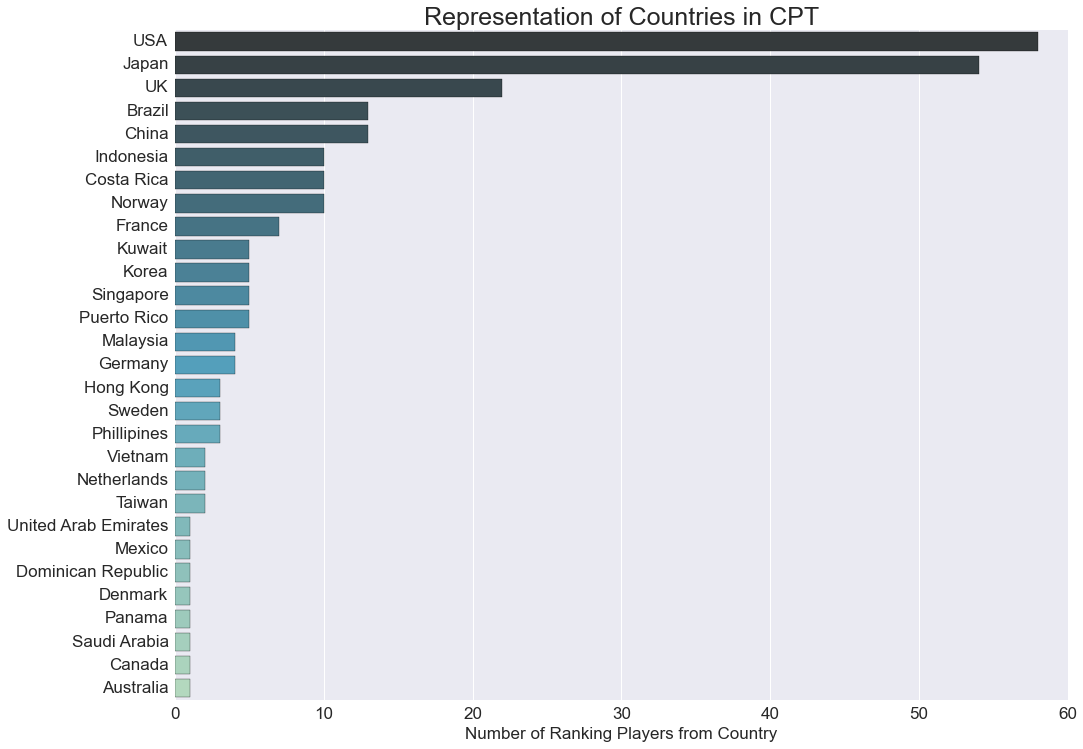

In [138]:
fig,ax = plt.subplots(figsize=(16,12))
x = d_country.sort_values(ascending=False)
y = d_country.sort_values(ascending=False).index
sns.barplot(x, y, palette="GnBu_d");
ax.tick_params(**tick_opts)
ax.set_xlabel("Number of Ranking Players from Country", **axis_opts)
ax.set_title("Representation of Countries in CPT", **title_opts)

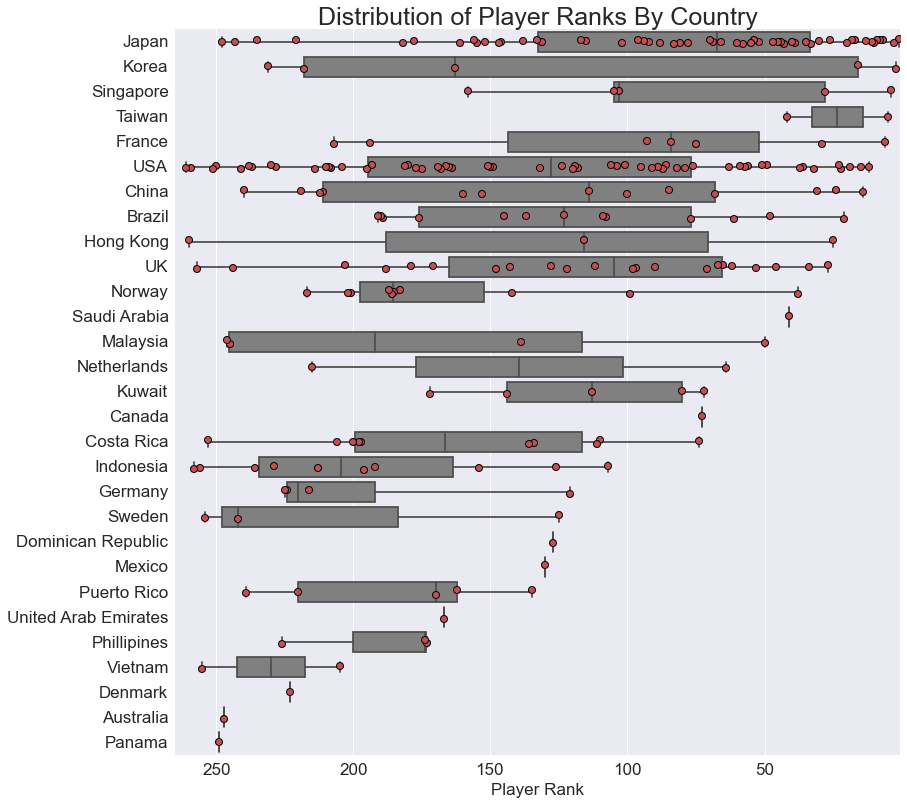

In [135]:
#Distribution of Player Ranks By Country
fig,ax = plt.subplots(figsize=(13,13))
sns.stripplot(y="Country", x="Rank", data=player_df[player_df['Country'] != ''], color=muted['red'],edgecolor='black', jitter=True);
sns.boxplot(y="Country", x="Rank", data=player_df[player_df['Country'] != ''], whis=np.inf, color='grey');
ax.tick_params(**tick_opts)
ax.set_xlim(265, .5);
ax.set_ylabel('')
ax.set_xlabel('Player Rank', **axis_opts)
ax.set_title("Distribution of Player Ranks By Country", **title_opts)

## - Player-Based Statistics

In [155]:
# data prep
name_sq = []
rank_sq = []
pt_sq = []
cntry_sq = []
for name in list(df_tmp.index):
    name_sq.extend(name for i in df_tmp.loc[name]["Placement Series"])
    rank_sq.extend(df_tmp.loc[name]["Placement Series"])
    pt_sq.extend(df_tmp.loc[name]["Points Series"])
    cntry_sq.extend(df_tmp.loc[name]["Country"] for i in df_tmp.loc[name]["Placement Series"])
d = {"Name": name_sq, "Ranks": rank_sq, "Country": cntry_sq, "Points": pt_sq}
df = pd.DataFrame(d)

(-50, 1050)

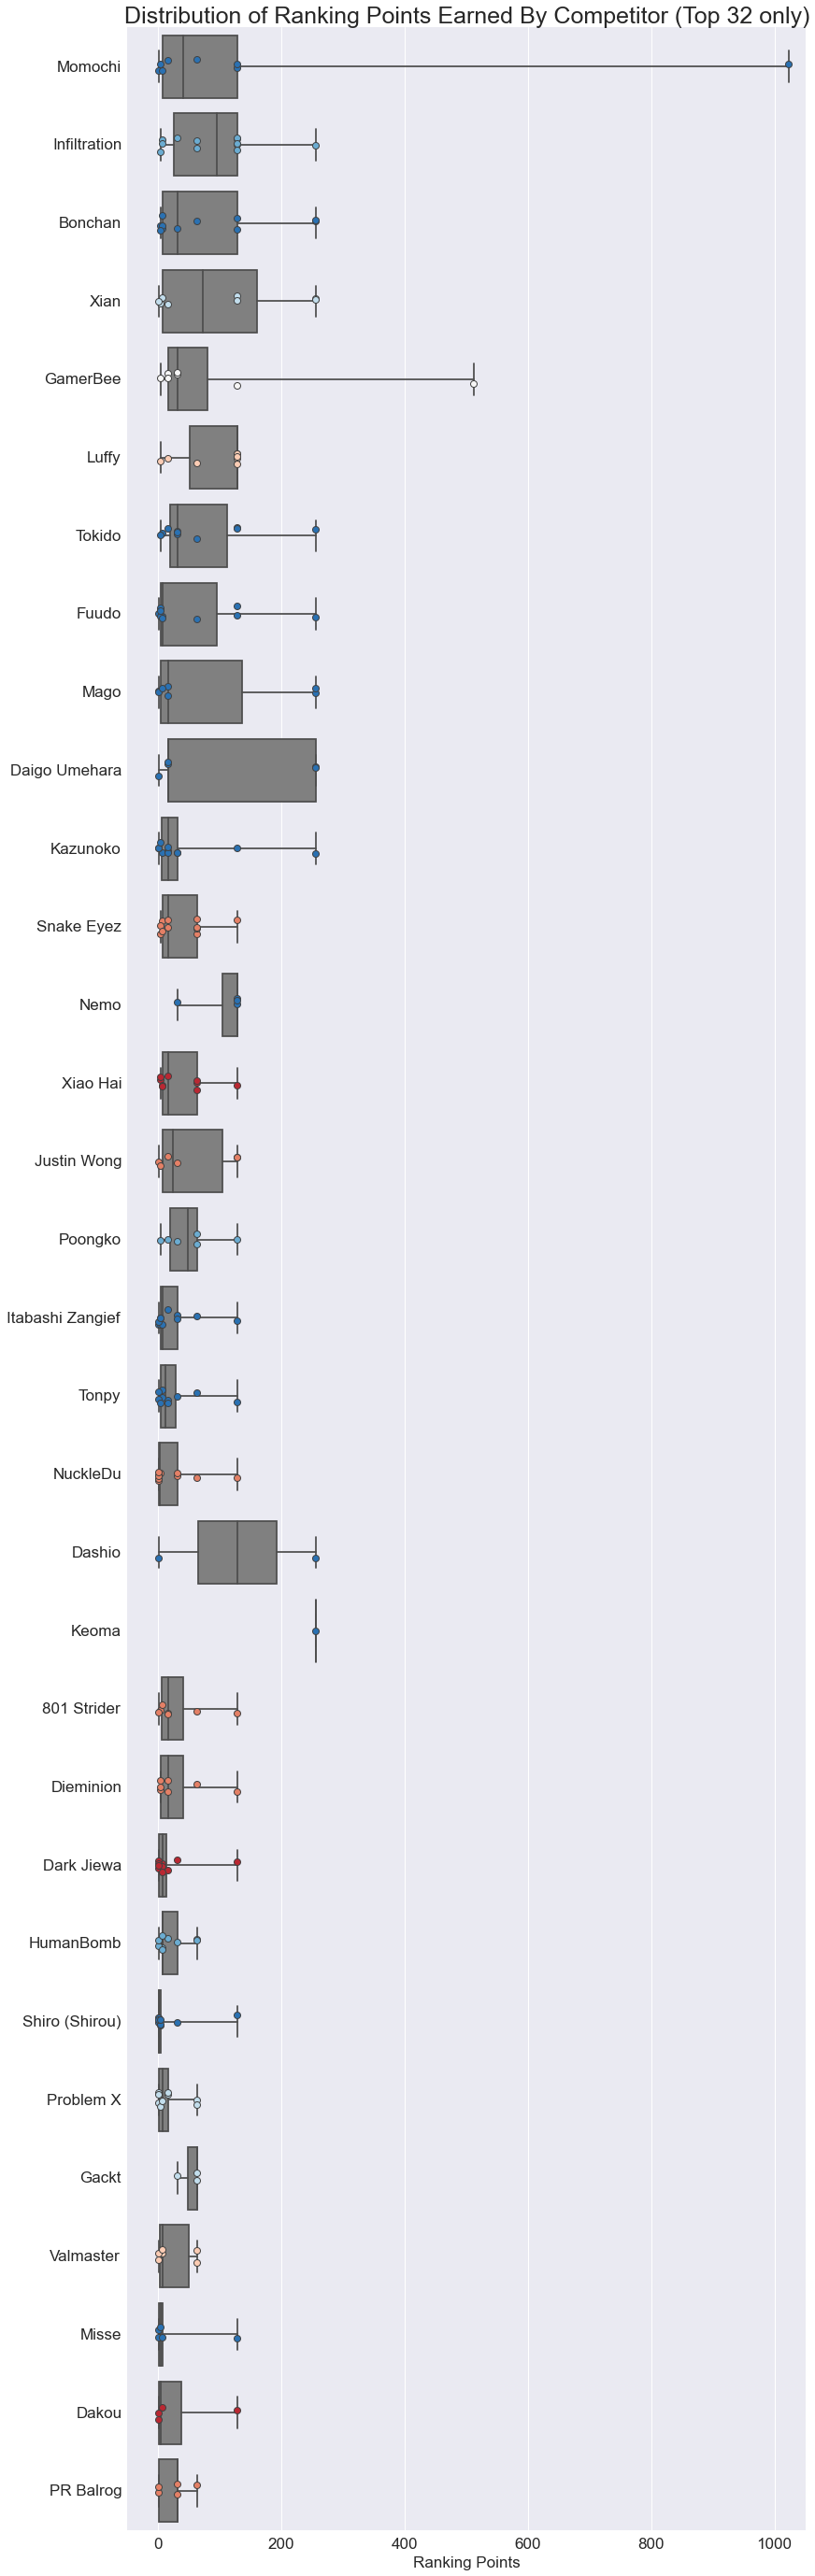

In [183]:
# distr or ranking points
fig,ax = plt.subplots(figsize=(13,48))
sns.boxplot(y="Name", x="Points", data=df, whis=np.inf, color='grey')
sns.stripplot(y="Name", x="Points", data=df, jitter=True, hue="Country", edgecolor="gray", 
              palette=sns.color_palette("RdBu_r", 7), split=False);
ax.legend('')
ax.tick_params(**tick_opts)
ax.set_xlabel('Ranking Points', **axis_opts)
ax.set_title("Distribution of Ranking Points Earned By Competitor (Top 32 only)", **title_opts)
ax.set_ylabel('')
ax.set_xlim(-50,1050)

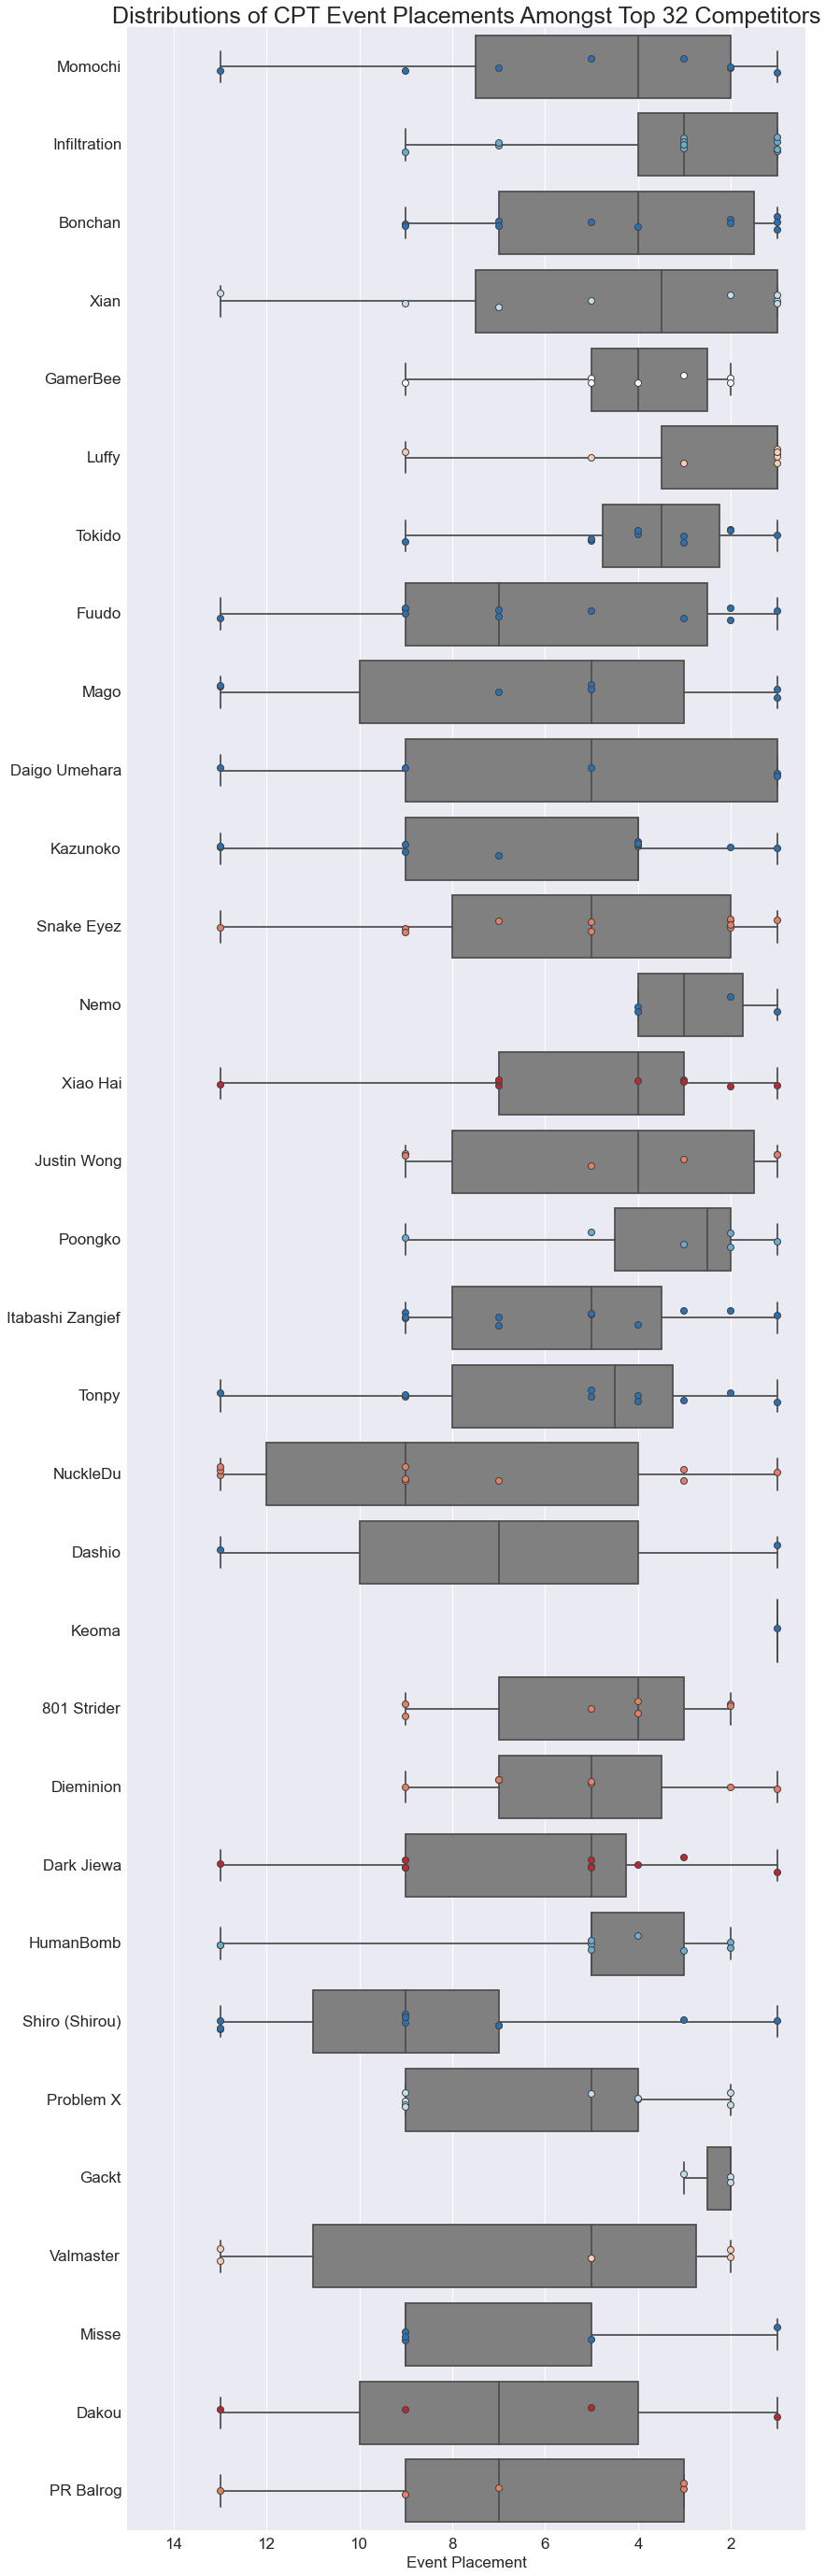

In [182]:
# Placement distribution
fig,ax = plt.subplots(figsize=(13,48))
sns.boxplot(y="Name", x="Ranks", data=df, whis=np.inf, color='grey')
sns.stripplot(y="Name", x="Ranks", data=df, jitter=True, hue="Country", edgecolor="gray", 
              palette=sns.color_palette("RdBu_r", 7), split=False);
ax.tick_params(**tick_opts)
ax.set_xlabel('Ranking Points', **axis_opts)
ax.set_title("Distributions of CPT Event Placements Amongst Top 32 Competitors", **title_opts)
ax.set_ylabel('')
ax.set_xlabel('Event Placement')
ax.set_xlim(15,.4)
ax.legend('')

# Junk Plots (for now)

In [142]:
x = player_df["Rank"].values
y_len = [len(i) for i in player_df["Placement Series"].values]
y_mean = [np.mean(i) for i in player_df["Placement Series"].values]
y_char = [len(set(i)) for i in player_df["Character Series"].values]

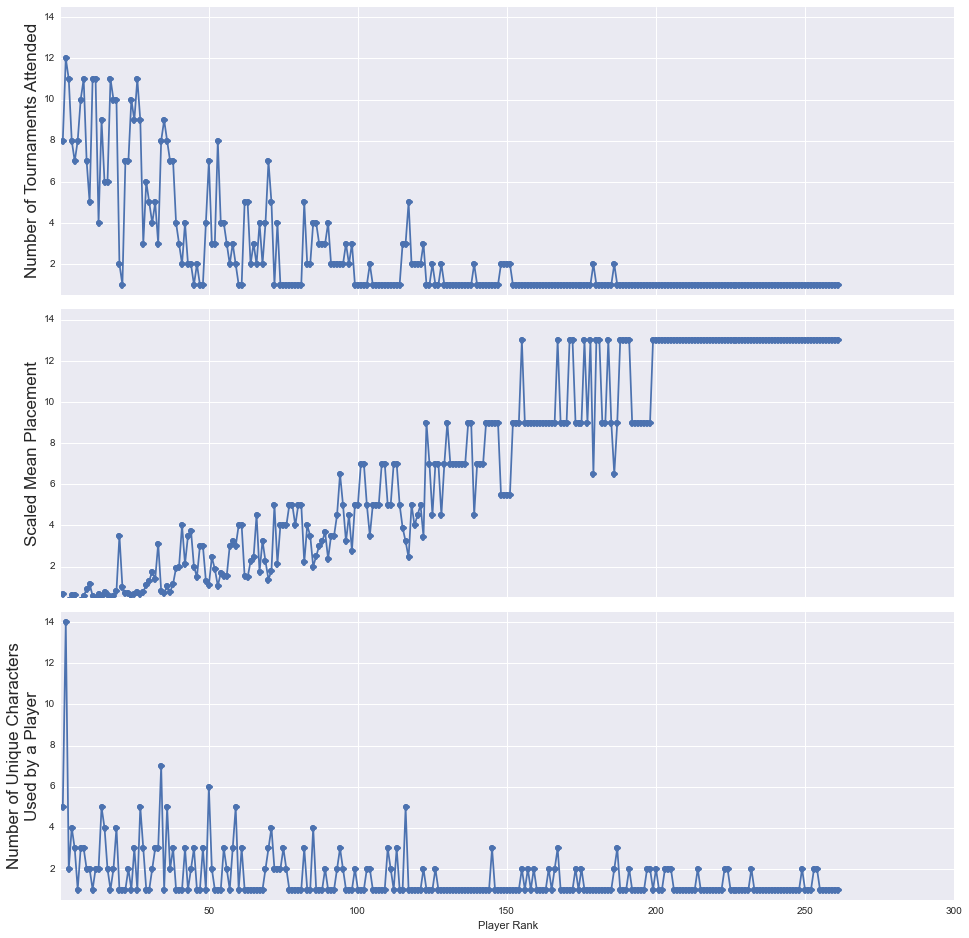

In [151]:
fig,(ax,ax1,ax2) = plt.subplots(figsize=(16,16), nrows=3, sharex=True, sharey=True)
ax.plot(x, y_len, marker='o')

ax.set_ylabel('Number of Tournaments Attended', **axis_opts)

ax1.plot(x, np.array(y_mean)/np.array(y_len), marker='o')
# ax1.set_xlabel('Player Rank')
ax1.set_ylabel('Scaled Mean Placement', **axis_opts)
ax1.set_ylim(14, 0)

ax2.plot(x, y_char, marker='o')
ax2.set_xlabel('Player Rank')
ax2.set_ylabel('Number of Unique Characters\nUsed by a Player', **axis_opts)
# ax2.set_xlabel('Player Rank')
ax2.set_xlim(0.5, None)
ax2.set_ylim(0.5, 14.5)
fig.subplots_adjust(hspace=0.05)